# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [28]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Load and preview the dataset

In [29]:
# Reading and previewing the data
ames_data = pd.read_csv("ames.csv")
ames_data.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [30]:
# Getting the shape of our dataframe (rows, columns)
ames_data.shape

(2930, 14)

In [31]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


In [4]:
# Getting the statistics of our feature columns.
ames_data.describe()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1971.356314,1984.266553,1051.255631,1159.557679,335.455973,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,472.658362,180796.060068
std,30.245361,20.860286,440.968018,391.890885,428.395715,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,215.187196,79886.692357
min,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1965.000000,793.000000,876.250000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,320.000000,129500.000000
50%,1973.000000,1993.000000,990.000000,1084.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,480.000000,160000.000000
75%,2001.000000,2004.000000,1301.500000,1384.000000,703.750000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,576.000000,213500.000000
max,2010.000000,2010.000000,6110.000000,5095.000000,2065.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1488.000000,755000.000000


## Data cleaning and preprocessing

In [5]:
# Checking if there are any empty cells in our columns.
print(ames_data.isnull().sum())    # The output shows that there are no missing entries!


Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64


In [6]:
# Checking if there are any duplicated rows. 
print(ames_data.duplicated().sum())


# It is clear that there are no duplicated columns!

7


In [7]:
# # Since we have 7 duplicate rows,
# Let's remove all the dumplicate rows on all columns and keep the first occurance.
ames_data_cleaned = ames_data.drop_duplicates(keep = 'first')

ames_data_cleaned.shape     # The ouput below shows that we have removed 7 rows!
                            # This is the data frame we will be working with in this project.


(2923, 14)

## Data visualization of our columns to see their correlation with each other.

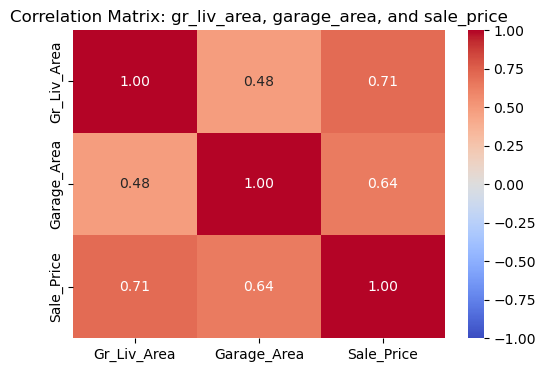

In [8]:
# Selecting the relevant features
features = ["Gr_Liv_Area", "Garage_Area", "Sale_Price"]
ames_corr = ames_data_cleaned[features] 

# Compute the correlation matrix of our relevant columns (columns of interest)
corr_matrix = ames_corr.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix: gr_liv_area, garage_area, and sale_price")
#plt.tight_layout()
plt.show()

From the confusion matrix above, the Gr_Liv_Area (0.71) has a stronger positive correlation vs the Sale_Price compared to the Garage_Area (0.64).Overall both features are positively correlated vs the Sale_Price.

## Selecting our independent and dependent variables.

In [9]:
# Our independent variables are Gr_Liv_Area-(Size of above grade,ground living area
# in square feets) and Garage_Area -(Size  of garage in square feets).

# Our dependent variable is the Sale_Price (in dollars).

In [10]:
# Exploring relationships between the independent and dependent variables.

# There is a positive correlation between our independent variables (especially the Gr_Liv_Area) and the dependent variable (Sale price). 
# This means that as the values of the independepnt variables increase, the value of our dependent variable also increases.

## Plotting the simple linear models for our features of interest (independent variables) vs our target (dependent variable).

Gr_Liv_Area Simple Linear Model

In [11]:
# Select and reshape data
x = ames_data_cleaned.iloc[:, 5].values
y = ames_data_cleaned.iloc[:, 13].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

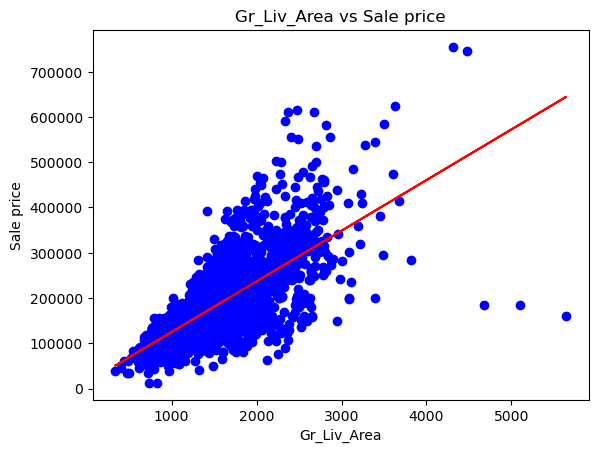

In [12]:
# Create Gr_Liv_Area linear regression model
gr_liv_area_model = LinearRegression()

# Create a model using fit(x, y)
gr_liv_area_model.fit(x,y)

# Use model to make a prediction.
y_pred = gr_liv_area_model.predict(x)

# Plot model and data
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('Gr_Liv_Area vs Sale price')
plt.xlabel('Gr_Liv_Area')
plt.ylabel('Sale price')
plt.show()

In [13]:
# Print Gr_Liv_Area model coefficient.
print('Coefficient for Gr_Liv_Area : \n ', gr_liv_area_model.coef_)

Coefficient for Gr_Liv_Area : 
  [[111.86748797]]


Garage Area Simple Linear Model. 

In [14]:
# Select and reshape the data
x = ames_data_cleaned.iloc[:, 12].values
y = ames_data_cleaned.iloc[:, 13].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

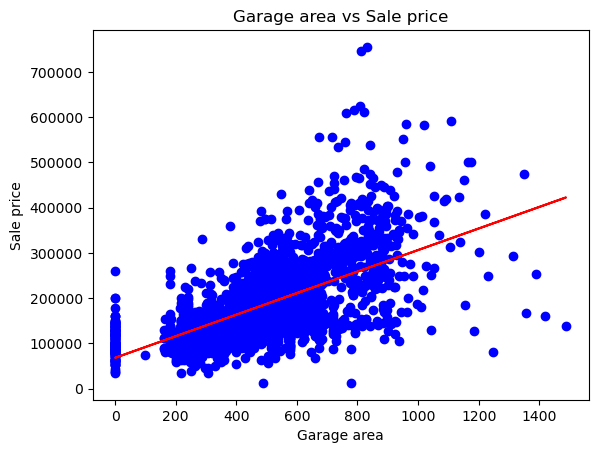

In [15]:
# Create the Garage_Area linear regression model
garage_area_model = LinearRegression()

# Create a model using fit(x, y)
garage_area_model.fit(x, y)

# Make prediction using the model
y_pred = garage_area_model.predict(x)

# Plot model and data
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('Garage area vs Sale price')
plt.xlabel('Garage area')
plt.ylabel('Sale price')
plt.show()

In [16]:
# Garage area model coefficient
print('Coefficient: \n', garage_area_model.coef_)

Coefficient: 
 [[238.06008665]]


## Multiple linear regression.

In [17]:
X = ames_data_cleaned.iloc[:,[5, 12]].values
X[1:5]

array([[ 896,  730],
       [1329,  312],
       [2110,  522],
       [1629,  482]])

In [18]:
# Select and reshape data
y = ames_data_cleaned.iloc[:, 13].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Create an empty linear regression model
sale_price_model = LinearRegression()

# Create the model using fit(X, y)
sale_price_model.fit(X, y)

# Get intercept and coefficients
print('intercept: \n', sale_price_model.intercept_)
print('Coefficients: \n', sale_price_model.coef_)

intercept: 
 [-10789.93857901]
Coefficients: 
 [[ 82.09555703 144.95385736]]


## Splitting the data into training and test set.

In [19]:
# Create a training and test set with a 75:25 split ratio
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

print('Training data: \n', X_train.shape, y_train.shape)
print('Test set: \n', X_test.shape, y_test.shape)

Training data: 
 (2192, 2) (2192, 1)
Test set: 
 (731, 2) (731, 1)


We need to apply scaling on our data because one independent variable has values ranging between 300 to 600 and the other has values ranging from around 800 to +- 4000. Scaling will ensure that both variables contribute equally to the model, so the coefficients are more comparable.

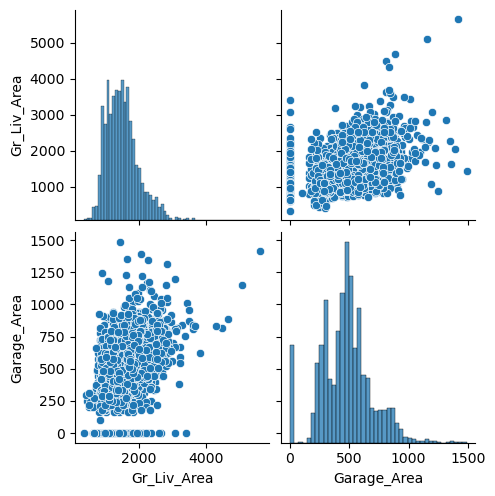

In [20]:
# First we must get the distribution of our data using a pairplot.
# We will extract the columns we need for the plot from our ames_data_cleaned dataframe.
columns_of_interest = ames_data_cleaned[['Gr_Liv_Area', 'Garage_Area']]

# Plot the pairplot using the data from the columns_of_interest.
sns.pairplot(columns_of_interest)

# Show the plot
plt.show()

Our data does not follow a Gaussian (normal) distribution, it is skewed to the right. Let's normalise our data using the MinMaxScaler. We fit it on the training set, we do not want anything on the test set!

In [21]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Fit the model on the training data.

In [22]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area' 
# Using the training set.

# Fit a model on training data
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# Evaluate on the test data
predictions = lm.predict(X_test)

### Providing the model intercept and coefficients.

In [23]:
# Print the model intercept and coefficients
# Print intercept and coefficients.
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [14699.69566978]
Coefficients: 
 [[450918.27647652 212976.70701125]]


### Generate predictions for the test set.

In [24]:
# Generate predictions for the test set
predictions[0:5]

array([[352471.2997495 ],
       [189294.69587556],
       [222300.87672981],
       [152773.09121012],
       [192955.32614706]])

In [25]:
# Evaluate the model(R squared score)
print ('R2 score:', round(model.score(X_test, y_test), 4)) 

R2 score: 0.5988


### Generate an error plot to visualise the differences between the predicted and actual values in the test set.

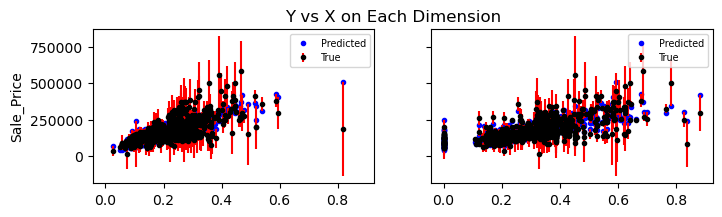

In [26]:
# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(ames_data_cleaned.columns[13])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [27]:
# Print the coefficients (of the trained model)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[450918.27647652 212976.70701125]]


**Interpret coefficients in the context of the prediction:**

Our coefficients are positive which means that as the median value of the independent variable increases, the median value of the dependent variable also increases, assuming all other factors remain the same. There is a positive correlation relationship between our variables.

**Summarise findings**

Our R2 value of 0.5988 indicate that approximately 58.99% of variability in the dependent variable (Sale_Price) is explained by the independent variables (Gr_Liv_Area and Garage_Area) in our model. This suggests that while the model has some explanatory power, there is still a large portion (about 40%) of the variability that is not accounted for by the variables in the model. More features (such as year built, type of bath, number of above grade kitchens, size of the floors, number of above grade bedrooms etc) that were not used in our model may contribute to the sale price of these houses.